In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px# Data visualization
from IPython.display import display
import os
import missingno as msno #Visualizing missingness


In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.
# pd.set_option('display.max_colwidth', -1) # will help to show all the text strings in the column.

In [3]:
data=pd.read_csv("archive.csv")
data.iloc[[*range(5)],[*range(0,3),*range(-3,0)]]  #to show the first and the last three columns iin dataset

,Year,Category,Prize,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,1912-06-12,Paris,France


In [4]:
data.shape

(969, 18)

In [5]:
np.round(data.isnull().sum()*100/len(data),2)

Year                     0.00
Category                 0.00
Prize                    0.00
Motivation               9.08
Prize Share              0.00
Laureate ID              0.00
Laureate Type            0.00
Full Name                0.00
Birth Date               2.99
Birth City               2.89
Birth Country            2.68
Sex                      2.68
Organization Name       25.49
Organization City       26.11
Organization Country    26.11
Death Date              36.33
Death City              38.18
Death Country           37.56
dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

.<a id=2><h1 align='center'><font color='#2B547E'> Data cleaning</font> 

In [7]:
data.columns=data.columns.str.replace(" ","_")
data.columns=data.columns.str.lower()

In [8]:
#to delete the rowsthat all values nan values
data.dropna(axis=0, how="all", subset=data.columns[1:], inplace=True)

In [9]:
data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [10]:
data.drop(["prize","laureate_id","motivation"],axis=1,inplace=True)

In [11]:
#checkfor missing values
np.round(data.isnull().sum()*100/len(data),2)

year                     0.00
category                 0.00
prize_share              0.00
laureate_type            0.00
full_name                0.00
birth_date               2.99
birth_city               2.89
birth_country            2.68
sex                      2.68
organization_name       25.49
organization_city       26.11
organization_country    26.11
death_date              36.33
death_city              38.18
death_country           37.56
dtype: float64

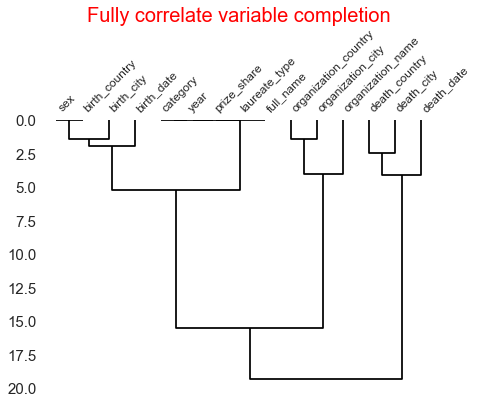

In [12]:
msno.dendrogram(data, figsize=(7,5), fontsize=12)
plt.title("Fully correlate variable completion", fontsize=20, color="red")
plt.show()

In [13]:
  data_o=data.loc[data["organization_country"].isnull()][:10]
data_o

,year,category,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
1,1901,Literature,1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
3,1901,Peace,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
7,1902,Literature,1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
9,1902,Peace,1/2,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
10,1902,Peace,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
14,1903,Literature,1/1,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,NaN,NaN,NaN,1910-04-26,Paris,France
16,1903,Peace,1/1,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom
19,1903,Physics,1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France
21,1904,Literature,1/2,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,NaN,NaN,NaN,1914-03-25,Maillane,France


>as we see that we have some columns that have nan values (death_date)that some awarded people havent died yet so we cannot impute the missings and also organization cities or the places they live we cannot cuz donn like to announces it or cuz of some changes

In [14]:
columns=['birth_city','birth_country','organization_name','organization_city','organization_country','death_city','sex','death_country']
data[columns]=data[columns].fillna('missed')

In [15]:
data[['death_date','birth_date']]=data[['death_date','birth_date']].fillna(0)

In [16]:
data=data[data["birth_date"]!=0]
data=data[data["death_date"]!=0]

In [17]:
np.round(data.isnull().sum()*100/len(data),2)

year                    0.0
category                0.0
prize_share             0.0
laureate_type           0.0
full_name               0.0
birth_date              0.0
birth_city              0.0
birth_country           0.0
sex                     0.0
organization_name       0.0
organization_city       0.0
organization_country    0.0
death_date              0.0
death_city              0.0
death_country           0.0
dtype: float64

In [18]:
 #for converting into date_time
data.loc[:,['birth_date','death_date']] = data.loc[:,['birth_date','death_date']].apply(pd.to_datetime, errors='coerce')
data["year"]=data["year"].astype("category")

In [19]:
#changing all object type into catogry type
x=data.select_dtypes(include=[object])
for i in x.columns:
    data=data.astype({i:'category'},errors='raise')

In [20]:
data.dtypes

year                          category
category                      category
prize_share                   category
laureate_type                 category
full_name                     category
birth_date              datetime64[ns]
birth_city                    category
birth_country                 category
sex                           category
organization_name             category
organization_city             category
organization_country          category
death_date              datetime64[ns]
death_city                    category
death_country                 category
dtype: object

In [21]:
data["year"]=data["year"].astype('int')
data['decade'] = (np.floor(data['year']/10) *10).astype(int)

In [22]:
data["year"]=data["year"].astype('category')

.<a id=3><h1 align='center'><font color='#2B547E'> Data Exploration</font> 

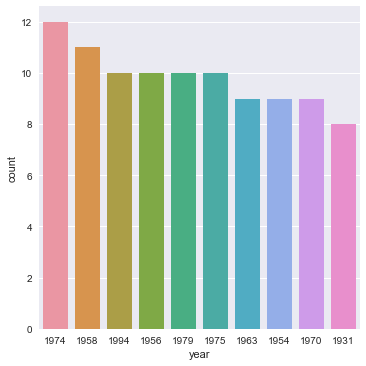

In [23]:
sns.catplot(data=data,x="year",order=data["year"].value_counts().index[:10],kind="count")

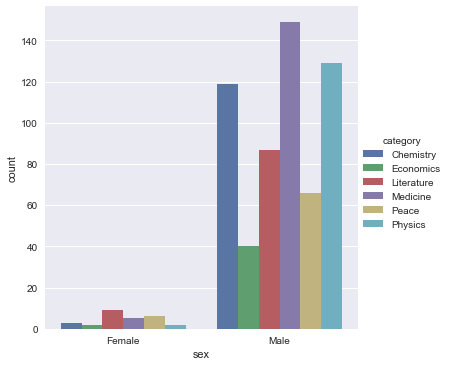

In [24]:
sns.catplot(data=data,x="sex",hue="category",kind="count")

In [25]:
data["category"].unique()

['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics', 'Economics']
Categories (6, object): ['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics', 'Economics']

In [27]:
data2 = data[['category','year']]
chemistry_year = data2[data2['category']=='Chemistry'].year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year':'count'})
economics_year = data2[data2['category']=='Economics'].year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year':'count'})
literature_year = data2[data2['category']=='Literature'].year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year':'count'})
medicine_year = data2[data2['category']=='Medicine'].year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year':'count'})
peace_year = data2[data2['category']=='Peace'].year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year':'count'})
physics_year = data2[data2['category']=='Physics'].year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year':'count'})


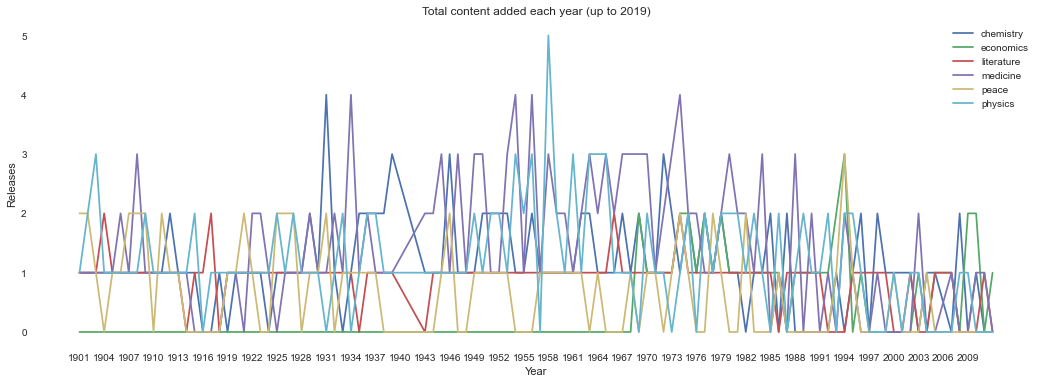

In [29]:
# Plotting USA born winners with % winners on the y-axis
# Setting the plotting theme
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(18, 6))

# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

sns.lineplot(data=chemistry_year, x='year', y='count',ci=95)
sns.lineplot(data=economics_year, x='year', y='count',ci=95)
sns.lineplot(data=literature_year, x='year', y='count',ci=95)
sns.lineplot(data=medicine_year, x='year', y='count',ci=95)
sns.lineplot(data=peace_year, x='year', y='count',ci=95)
sns.lineplot(data=physics_year, x='year', y='count',ci=95)
ax.set_xticks(np.arange(1901, 2012, 3))
plt.title("Total content added each year (up to 2019)")
plt.legend(['chemistry','economics','literature','medicine','peace','physics'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

In [53]:
data["sex_male"]=data["sex"]=="Male"
prop_male_winners = data.groupby('decade', as_index=False)['sex_male'].mean()
display(prop_male_winners)

,decade,sex_male
0,1900,0.95
1,1910,0.97
2,1920,0.96
3,1930,0.95
4,1940,0.93
5,1950,1.00
6,1960,0.96
7,1970,0.98
8,1980,0.93
9,1990,0.95


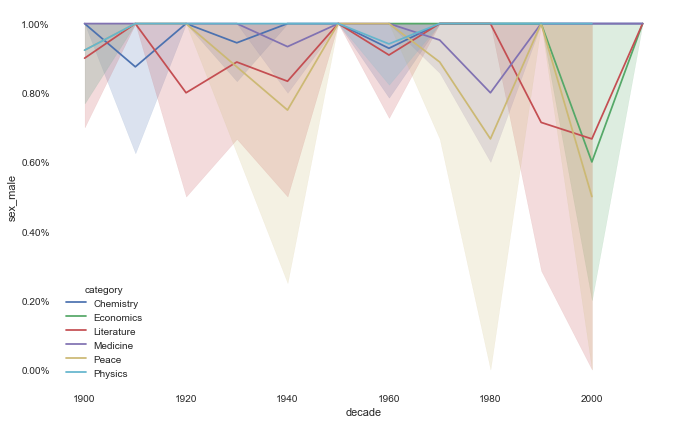

In [58]:
# Setting the plotting theme
sns.set_style("ticks")
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]
# Plotting USA born winners 
ax = sns.lineplot(data=data,x='decade',y='sex_male',hue=
                 "category")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

>as we see that the most categories are physics and medicine have the most highest rate in awards

In [ ]:
data["sex"].unique()

In [60]:
data['female_winner'] = data['sex'] == 'Female'
data["male_winner"]=data["sex"]=="Male"
data.groupby(['decade','category'],as_index=False)['female_winner'].mean()

,decade,category,female_winner
0,1900,Chemistry,0.00
1,1900,Economics,NaN
2,1900,Literature,0.10
3,1900,Medicine,0.00
4,1900,Peace,0.08
5,1900,Physics,0.08
6,1910,Chemistry,0.12
7,1910,Economics,NaN
8,1910,Literature,0.00
9,1910,Medicine,0.00


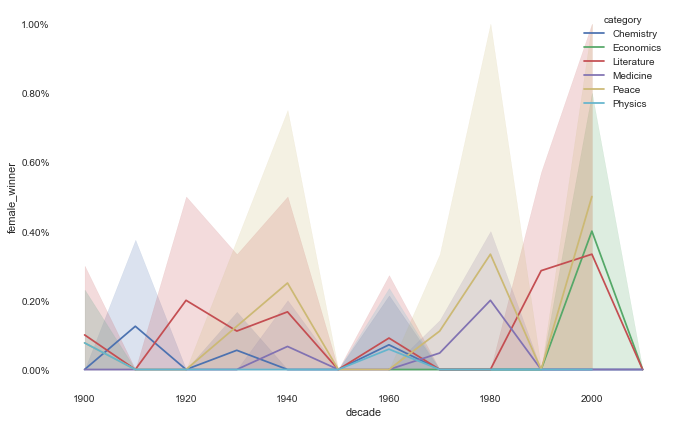

In [30]:
# Calculating the proportion of female laureates per decade
data['female_winner'] = data['sex'] == 'Female'
prop_female_winners = data.groupby(['decade','category'],as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
# Setting the plotting theme
sns.set_style("ticks")

# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(data=data,x='decade',y='female_winner',hue='category')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

>so as we see tat the most catogries for women arev

<AxesSubplot:xlabel='category'>

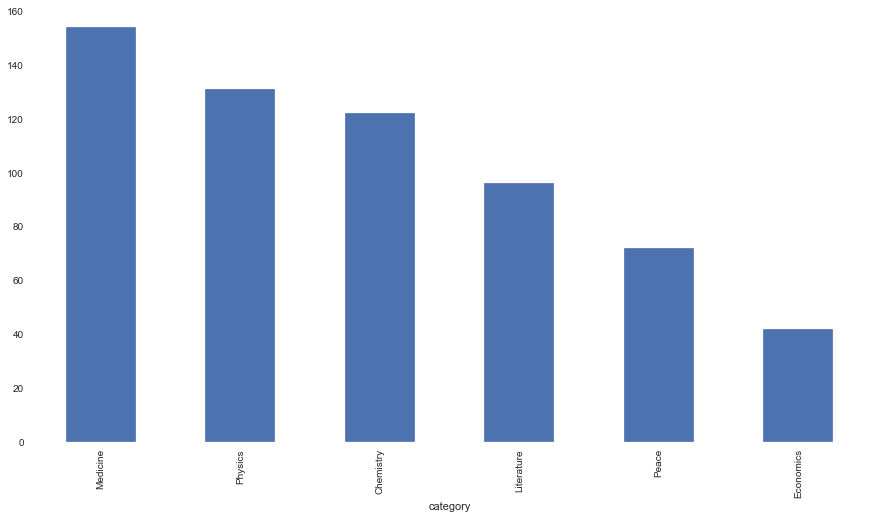

In [31]:
df=data.groupby(["category"])["year"].count().sort_values(ascending=False)[:10]
df.plot.bar(figsize=(15,8))

<AxesSubplot:xlabel='laureate_type', ylabel='count'>

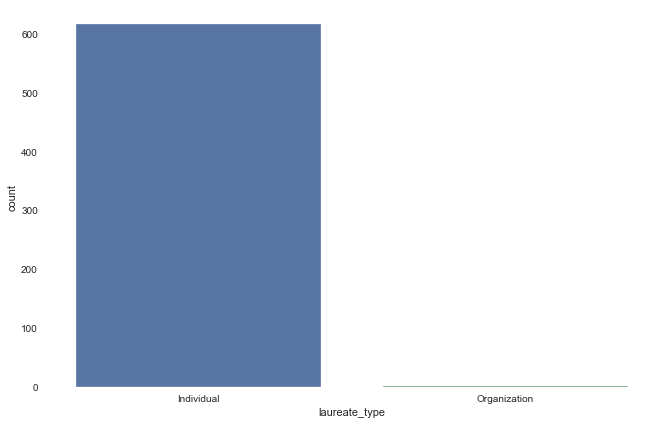

In [32]:
sns.countplot(data=data,x="laureate_type")

<AxesSubplot:xlabel='prize_share', ylabel='count'>

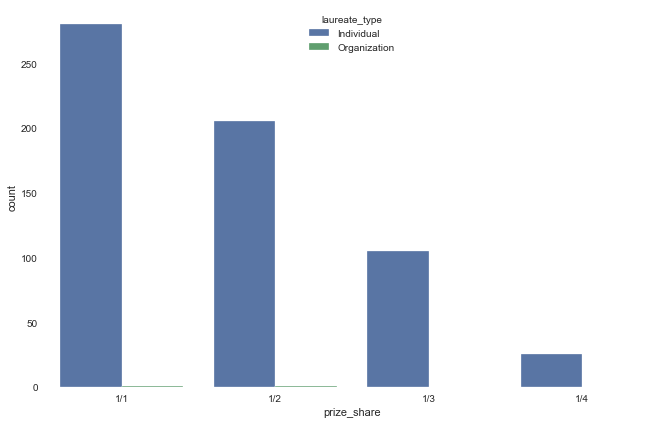

In [33]:
sns.countplot(data=data,x="prize_share",hue="laureate_type")

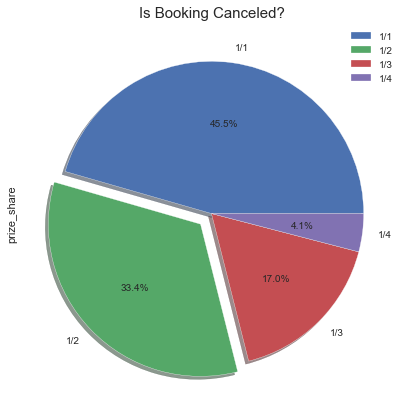

In [34]:
explode=(0,0.1,0,0)
data["prize_share"].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True,explode=explode)
plt.legend()
plt.title('Is Booking Canceled?', fontsize=15)
plt.show()

In [35]:
# Picking out the first woman to win a Nobel Prize
data[data['sex']=='Female'].nsmallest(1,'decade')


,year,category,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner
19,1903,Physics,1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,missed,missed,missed,1934-07-04,Sallanches,France,1900,True


In [36]:
data[data['sex']=='Female'].nlargest(1,'decade')


,year,category,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner
795,2004,Peace,1/1,Individual,Wangari Muta Maathai,1940-04-01,Nyeri,Kenya,Female,missed,missed,missed,2011-09-25,Nairobi,Kenya,2000,True


Text(0.5, 0.98, 'Age of Nobel Prize Winners')

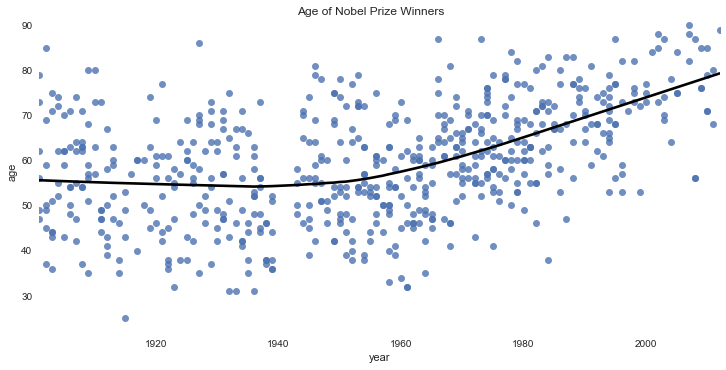

In [37]:
# Converting birth_date from String to datetime
data['birth_date'] = pd.to_datetime(data['birth_date'])
data["year"]=data["year"].astype('int')
# Calculating the age of Nobel Prize winners
data['age'] = (- data['birth_date'].dt.year + data['year'])

# Setting the plotting theme
sns.set_style("ticks")
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting the age of Nobel Prize winners
lm = sns.lmplot(data=data,x='year',y='age',lowess=True,aspect=2,line_kws={'color':'black'})

# Access the figure
fig = lm.fig 

# Add a title to the Figure
fig.suptitle("Age of Nobel Prize Winners", fontsize=12)

In [ ]:
sns.countplot(data=data, x='organization_country', order=data['organization_country'].value_counts().index[:10])
plt.xticks(rotation=90);

<AxesSubplot:xlabel='category'>

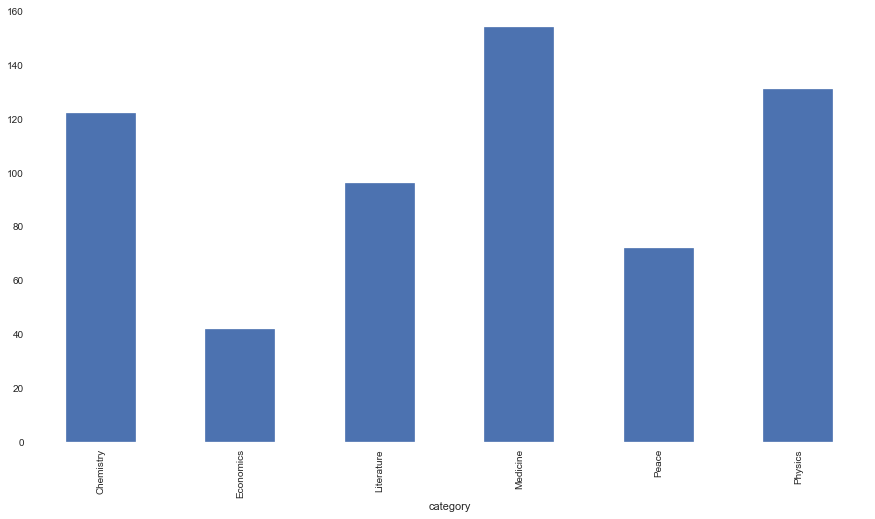

In [51]:
data["Usa_winners"]=data["organization_country"]=="United States of America"
data_winn=data.groupby(['category'])['Usa_winners'].count()
data_winn.plot.bar(figsize=(15,8))

In [49]:
data["Usa_winners"]=data["organization_country"]=="United States of America"
prop_usa_winners = data.groupby('decade', as_index=False)['Usa_winners'].mean()
display(prop_usa_winners)

,decade,Usa_winners
0,1900,0.02
1,1910,0.05
2,1920,0.04
3,1930,0.20
4,1940,0.36
5,1950,0.41
6,1960,0.38
7,1970,0.35
8,1980,0.47
9,1990,0.57


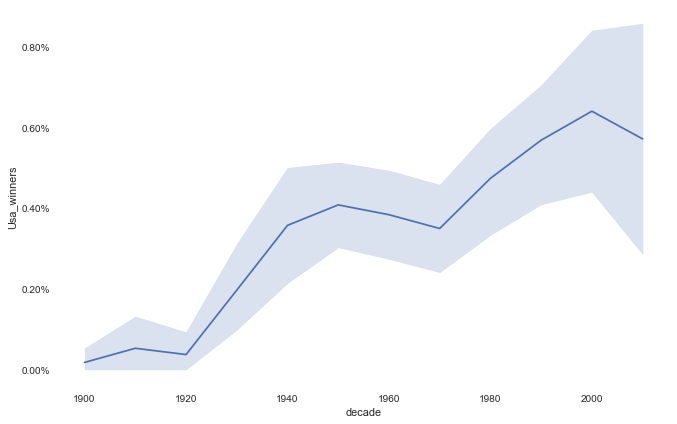

In [50]:
# Setting the plotting theme
sns.set_style("ticks")
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(data=data,x='decade',y='Usa_winners')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

In [46]:
 data.groupby('category', as_index=False)['age'].mean()


,category,age
0,Chemistry,56.23
1,Economics,70.74
2,Literature,64.80
3,Medicine,57.57
4,Peace,65.76
5,Physics,54.23


In [47]:
data.nsmallest(1,'age')


,year,category,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner,age
86,1915,Physics,1/2,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Male,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,1910,False,25.0


In [ ]:
data.nlargest(1,'age')

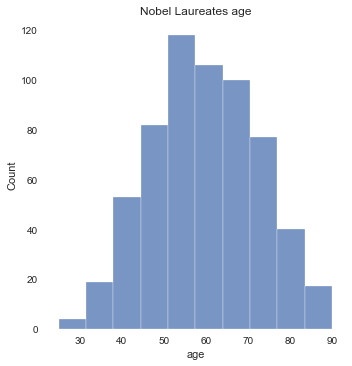

In [73]:
# Converting birth_date from String to datetime
data['birth_date'] = pd.to_datetime(data['birth_date'])

# Calculating the age of Nobel Prize winners
data['age'] = data['year'] - data['birth_date'].dt.year
sns.displot(data=data, x="age", bins=10)
plt.title("Nobel Laureates age")
plt.show()

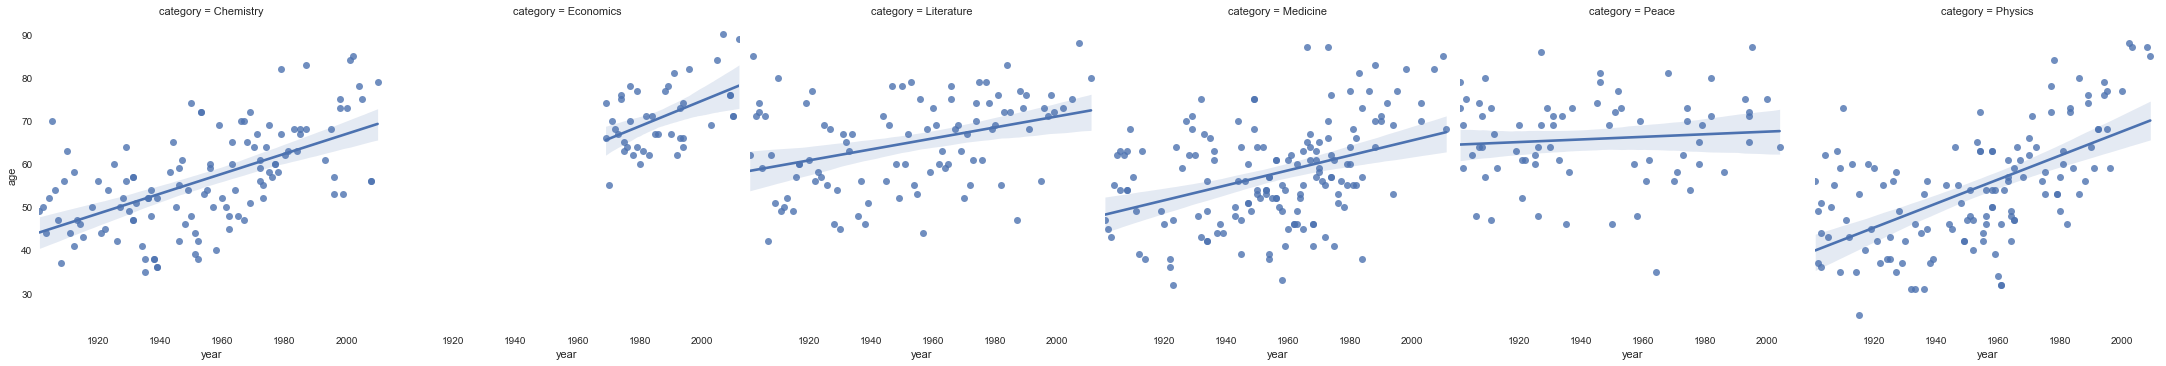

In [77]:
sns.lmplot(data=data,x="year",y="age",col="category")